Business use several KPI metrics to evaluate the business performance. This notebook illustrates the computation of these KPI metrics

In [1]:
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [6]:
tx_data = pd.read_csv('./Downloads/data/OnlineRetail.csv',encoding= 'unicode_escape')
tx_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate'])
tx_data['InvoiceYearMonth'] = tx_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)
tx_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012


### Compute revenue column

In [8]:
tx_data['Revenue'] = tx_data['UnitPrice'] * tx_data['Quantity']

tx_revenue = tx_data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


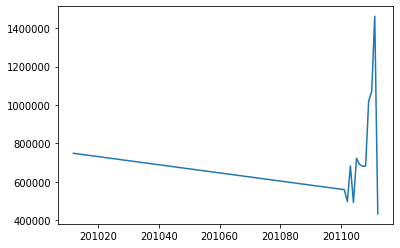

In [9]:
plt.plot(tx_revenue['InvoiceYearMonth'],tx_revenue['Revenue'])

### Calculate monthly growth 

In [10]:
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()
tx_revenue.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


In [11]:
tx_revenue.query("InvoiceYearMonth < 201112")['InvoiceYearMonth']

0     201012
1     201101
2     201102
3     201103
4     201104
5     201105
6     201106
7     201107
8     201108
9     201109
10    201110
11    201111
Name: InvoiceYearMonth, dtype: int64

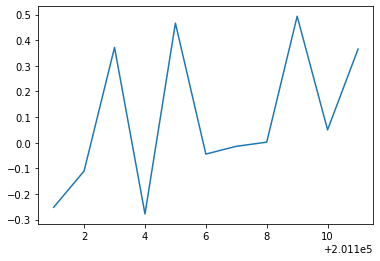

In [12]:
plt.plot(tx_revenue.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],tx_revenue.query("InvoiceYearMonth < 201112")['MonthlyGrowth'])

Everything looks good, we saw 36.5% growth previous month (December is excluded in the code since it hasn’t been completed yet). But we need to identify what exactly happened on April. Was it due to less active customers or our customers did less orders? Maybe they just started to buy cheaper products? We can’t say anything without doing a deep-dive analysis.   

Let view of revenue by country.

In [13]:
tx_data.groupby('Country')['Revenue'].sum().sort_values(ascending=False).astype(int)

Country
United Kingdom          8187806
Netherlands              284661
EIRE                     263276
Germany                  221698
France                   197403
Australia                137077
Switzerland               56385
Spain                     54774
Belgium                   40910
Sweden                    36595
Japan                     35340
Norway                    35163
Portugal                  29367
Finland                   22326
Channel Islands           20086
Denmark                   18768
Italy                     16890
Cyprus                    12946
Austria                   10154
Hong Kong                 10117
Singapore                  9120
Israel                     7907
Poland                     7213
Unspecified                4749
Greece                     4710
Iceland                    4309
Canada                     3666
Malta                      2505
United Arab Emirates       1902
USA                        1730
Lebanon                    1693


### Working for United Kingdom only

In [14]:
tx_uk = tx_data.query("Country=='United Kingdom' & CustomerID >0 ").reset_index(drop=True)
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


In [15]:
tx_uk.shape

(361878, 10)

### Monthly Active Customers
 Customers are active if they make purchase which we will use to determine whether or not customer is active

In [16]:
tx_monthly_active = tx_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
tx_monthly_active.head()

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817


In [17]:
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


### Calculate monthly sales order`

In [18]:
tx_monthly_sales = tx_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
tx_monthly_sales.head()

,InvoiceYearMonth,Quantity
0,201012,252812
1,201101,198957
2,201102,211524
3,201103,272305
4,201104,247915


In [19]:
tx_monthly_sales['Quantity'].mean()

308348.6923076923

### Average Revenue per Order

In [20]:
tx_monthly_order_avg = tx_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()
tx_monthly_order_avg.head()

,InvoiceYearMonth,Revenue
0,201012,19.717955
1,201101,18.784357
2,201102,19.263039
3,201103,18.583718
4,201104,17.639499


In [21]:
tx_monthly_order_avg.Revenue.mean()

18.96865359334786

# New & Existing Users    

some other important metrics:   
•	**New Customer Ratio**: a good indicator of if we are losing our existing customers or unable to attract new ones   
• **Retention Rate**: King of the metrics. Indicates how many customers we retain over specific time window. We will be showing examples for monthly retention rate and cohort based retention rate.   


Assume  **a new customer** is whoever did his/her first purchase in the time window we defined. We will do it monthly for this example. **We use .min() function to find our first purchase date for each customer and define new customers based on that.**


In [22]:

tx_uk.groupby('CustomerID').InvoiceDate.min().reset_index()

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12747.0,2010-12-05 15:38:00
2,12748.0,2010-12-01 12:48:00
3,12749.0,2011-05-10 15:25:00
4,12820.0,2011-01-17 12:34:00
...,...,...
3945,18280.0,2011-03-07 09:52:00
3946,18281.0,2011-06-12 10:53:00
3947,18282.0,2011-08-05 13:35:00
3948,18283.0,2011-01-06 14:14:00


In [23]:
#create a dataframe contaning CustomerID and first purchase date


tx_min_purchase = tx_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']

tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)
tx_min_purchase.head()

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101


In [24]:
tx_uk = pd.merge(tx_uk, tx_min_purchase, on='CustomerID')
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012


### Creating a userType column    
where a new customer made a purchase recently

In [25]:
tx_uk['UserType'] = 'New'
tx_uk.loc[tx_uk['InvoiceYearMonth']>tx_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'

tx_uk.UserType.value_counts()

Existing    256114
New         105764
Name: UserType, dtype: int64

In [26]:
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New


### Compute the revenuew for each user type

In [27]:
tx_user_type_revenue = tx_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()
tx_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")

,InvoiceYearMonth,UserType,Revenue
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860
10,201105,New,90847.490


In [28]:
tx_user_type_revenue = tx_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")


Look at number of new customer per month

In [29]:
tx_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()

InvoiceYearMonth
201012    871
201101    362
201102    339
201103    408
201104    276
201105    252
201106    207
201107    172
201108    140
201109    275
201110    318
201111    296
201112     34
Name: CustomerID, dtype: int64

Look at number of current customer per month

In [30]:
tx_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()

InvoiceYearMonth
201101     322
201102     375
201103     515
201104     541
201105     733
201106     736
201107     727
201108     727
201109     902
201110     967
201111    1252
201112     583
Name: CustomerID, dtype: int64

### Compute a ratio of new customer vs current customer for (invoice) month year

In [32]:
tx_user_ratio = tx_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/tx_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()
tx_user_ratio.head()

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793


New Customer Ratio has declined as expected (we assumed on Feb, all customers were New) and  around 20%.

# Create Signup Data

In [33]:
tx_min_purchase.head()

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101


In [34]:
unq_month_year =  tx_min_purchase.MinPurchaseYearMonth.unique()
unq_month_year

array([201101, 201012, 201105, 201109, 201102, 201110, 201108, 201106,
       201103, 201107, 201104, 201111, 201112])

Let create signup date such s.t current customer will have signup date as random date in recent purchase date 

In [38]:
def generate_signup_date(year_month):
    signup_date = [el for el in unq_month_year if year_month >= el]
    return np.random.choice(signup_date)

In [39]:
tx_min_purchase['SignupYearMonth'] = tx_min_purchase.apply(lambda row: generate_signup_date(row['MinPurchaseYearMonth']),axis=1)


tx_min_purchase.head()

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth,SignupYearMonth
0,12346.0,2011-01-18 10:01:00,201101,201101
1,12747.0,2010-12-05 15:38:00,201012,201012
2,12748.0,2010-12-01 12:48:00,201012,201012
3,12749.0,2011-05-10 15:25:00,201105,201104
4,12820.0,2011-01-17 12:34:00,201101,201101


In [40]:
tx_min_purchase['InstallYearMonth'] = tx_min_purchase.apply(lambda row: generate_signup_date(row['SignupYearMonth']),axis=1)
tx_min_purchase.head()

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth,SignupYearMonth,InstallYearMonth
0,12346.0,2011-01-18 10:01:00,201101,201101,201101
1,12747.0,2010-12-05 15:38:00,201012,201012,201012
2,12748.0,2010-12-01 12:48:00,201012,201012,201012
3,12749.0,2011-05-10 15:25:00,201105,201104,201103
4,12820.0,2011-01-17 12:34:00,201101,201101,201012


In [41]:
### Let generating channel of acquisition.

In [42]:
channels = ['organic','inorganic','referral']
tx_min_purchase['AcqChannel'] = tx_min_purchase.apply(lambda x: np.random.choice(channels),axis=1)



# Activation Rate

In [43]:
tx_activation = tx_min_purchase[tx_min_purchase['MinPurchaseYearMonth'] == tx_min_purchase['SignupYearMonth']].groupby('SignupYearMonth').CustomerID.count()/tx_min_purchase.groupby('SignupYearMonth').CustomerID.count()
tx_activation = tx_activation.reset_index()
tx_activation.head()

,SignupYearMonth,CustomerID
0,201012,0.571148
1,201101,0.269289
2,201102,0.259341
3,201103,0.304348
4,201104,0.239316


In [44]:
tx_activation_ch = tx_min_purchase[tx_min_purchase['MinPurchaseYearMonth'] == tx_min_purchase['SignupYearMonth']].groupby(['SignupYearMonth','AcqChannel']).CustomerID.count()/tx_min_purchase.groupby(['SignupYearMonth','AcqChannel']).CustomerID.count()
tx_activation_ch = tx_activation_ch.reset_index()
tx_activation_ch.head()

,SignupYearMonth,AcqChannel,CustomerID
0,201012,inorganic,0.572277
1,201012,organic,0.547893
2,201012,referral,0.594378
3,201101,inorganic,0.258197
4,201101,organic,0.247664


# Monthly Retention Rate

In [45]:
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New


In [46]:
df_monthly_active = tx_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
df_monthly_active.head()

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817


In [47]:
tx_user_purchase = tx_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().astype(int).reset_index()
tx_user_purchase.head()

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,201101,0
1,12747.0,201012,706
2,12747.0,201101,303
3,12747.0,201103,310
4,12747.0,201105,771


In [48]:
tx_user_purchase.Revenue.sum()

6762528

### Monthly Retention Rate   

Retention rate should be monitored very closely because it indicates how sticky is your service and how well your product fits the market. For making Monthly Retention Rate visualized, we need to calculate how many customers retained from previous month.

Monthly Retention Rate = Retained Customers From Prev. Month/Active Customers Total


In [49]:
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()
tx_retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


Retention table shows us which customers are active on each month (1 stands for active).

In [50]:
months = tx_retention.columns[2:]
months

Index([201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109,
       201110, 201111, 201112],
      dtype='object', name='InvoiceYearMonth')

In [51]:
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
tx_retention = pd.DataFrame(retention_array)

In [52]:
tx_retention.head()

,InvoiceYearMonth,TotalUserCount,RetainedUserCount
0,201102,714,263
1,201103,923,305
2,201104,817,310
3,201105,985,369
4,201106,943,417


Retention table shows us which customers are active on each month (1 stands for active).
With the help of a simple for loop, for each month we calculate Retained Customer Count from previous month and Total Customer Count


In [53]:
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']
tx_retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,985,369,0.374619
4,201106,943,417,0.442206
5,201107,899,379,0.421580
6,201108,867,391,0.450980
7,201109,1177,417,0.354291
8,201110,1285,502,0.390661
9,201111,1548,616,0.397933


# Churn Rate

In [54]:
tx_retention['ChurnRate'] =  1- tx_retention['RetentionRate']

# Cohort Base Retention    

Cohort Based Retention Rate
There is another way of measuring Retention Rate which allows you to see Retention Rate for each cohort. Cohorts are determined as first purchase year-month of the customers. We will be measuring what percentage of the customers retained after their first purchase in each month. This view will help us to see how recent and old cohorts differ regarding retention rate and if recent changes in customer experience affected new customer’s retention or not.


In [55]:
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()
tx_retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [56]:
tx_retention.columns = [ 'm_' + str(column) for column in tx_retention.columns]

In [57]:
months

Index([201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109,
       201110, 201111, 201112],
      dtype='object', name='InvoiceYearMonth')

In [58]:
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count =  retention_data['TotalUserCount'] = tx_retention['m_' + str(selected_month)].sum()
    retention_data[selected_month] = 1 
    
    query = "{} > 0".format('m_' + str(selected_month))
    

    for next_month in next_months:
        query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(tx_retention.query(query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)
    
tx_retention = pd.DataFrame(retention_array)    

In [59]:
tx_retention.index = months
tx_retention.head()

,TotalUserCount,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
InvoiceYearMonth,,,,,,,,,,,,,
201101,684,1.0,0.38,0.26,0.18,0.15,0.13,0.12,0.11,0.10,0.08,0.08,0.07
201102,714,NaN,1.00,0.43,0.23,0.19,0.16,0.14,0.12,0.11,0.10,0.09,0.07
201103,923,NaN,NaN,1.00,0.34,0.23,0.17,0.13,0.11,0.11,0.09,0.09,0.06
201104,817,NaN,NaN,NaN,1.00,0.45,0.28,0.20,0.16,0.15,0.12,0.11,0.08
201105,985,NaN,NaN,NaN,NaN,1.00,0.42,0.25,0.19,0.16,0.13,0.12,0.08
